In [48]:
import pandas as pd
import numpy as np

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pylab as plt

import operator

In [4]:
data = pd.read_csv('iris.csv')
data.drop(columns=['Id'], inplace=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
X = data.drop(columns=['Species'])
Y = data.Species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=32)


In [40]:
clf= DecisionTreeClassifier(max_depth=4,min_samples_leaf=10,min_samples_split=10) #criterion="entropy",max_depth=5 0.7205308352849337
clf = clf.fit(x_train,y_train)
y_pred_dt = clf.predict(x_test)
y_train_pred_dt = clf.predict(x_train)
print("Dokładność:",metrics.accuracy_score(y_test, y_pred_dt))
print("Dokładność na zbiorze uczącym:",metrics.accuracy_score(y_train, y_train_pred_dt))

Dokładność: 0.9777777777777777
Dokładność na zbiorze uczącym: 0.9523809523809523


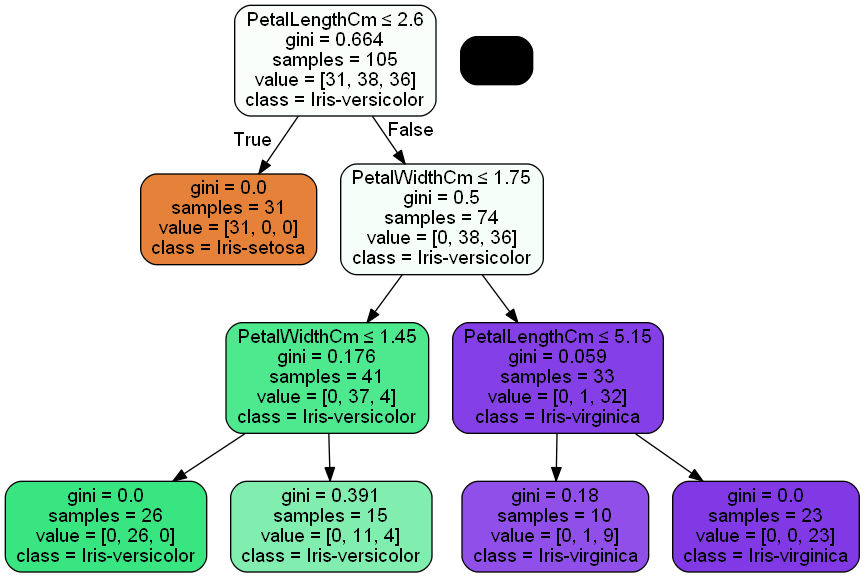

In [41]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = list(X.columns),class_names=clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_visualization.png')
Image(graph.create_png())

In [42]:
rnd_clf = RandomForestClassifier(n_estimators=5,max_features=4,min_samples_leaf=5,n_jobs=-1)
rnd_clf.fit(x_train,y_train)
y_pred_rnd = rnd_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rnd))
y_train_pred_rnd = rnd_clf.predict(x_train)
print("Accuracy_train:",metrics.accuracy_score(y_train, y_train_pred_rnd))

Accuracy: 0.9777777777777777
Accuracy_train: 0.9523809523809523


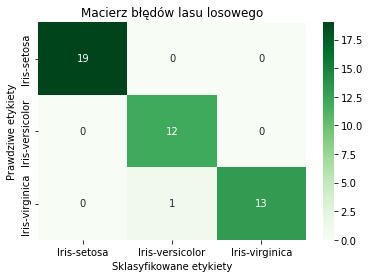

In [43]:
#las losowy macierz błędów

cm_rnd = confusion_matrix(y_test, y_pred_rnd)
ax= plt.subplot()
sns.heatmap(cm_rnd, annot=True, fmt='g', ax=ax,cmap='Greens')
ax.set_xlabel('Sklasyfikowane etykiety');ax.set_ylabel('Prawdziwe etykiety'); 
ax.set_title('Macierz błędów lasu losowego'); 
ax.xaxis.set_ticklabels(rnd_clf.classes_); ax.yaxis.set_ticklabels(rnd_clf.classes_);

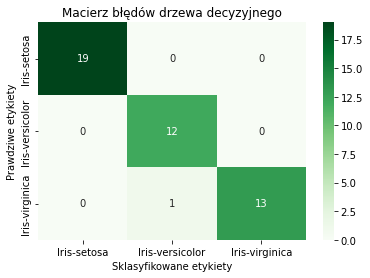

In [44]:
#drzewo macierz błędów

cm_dt = confusion_matrix(y_test, y_pred_dt)
ax= plt.subplot()
sns.heatmap(cm_dt, annot=True, fmt='g', ax=ax,cmap='Greens')
ax.set_xlabel('Sklasyfikowane etykiety');ax.set_ylabel('Prawdziwe etykiety'); 
ax.set_title('Macierz błędów drzewa decyzyjnego'); 
ax.xaxis.set_ticklabels(clf.classes_); ax.yaxis.set_ticklabels(clf.classes_);

In [49]:

importance = list(rnd_clf.feature_importances_)
features = list(X.columns)

zip_iterator = zip(features, importance)
importances = dict(zip_iterator)
sorted_imp = sorted(importances.items(), key=operator.itemgetter(1),reverse=True)
sorted_imp

[('PetalWidthCm', 0.8784414416282269),
 ('PetalLengthCm', 0.11439361489850194),
 ('SepalLengthCm', 0.007164943473271133),
 ('SepalWidthCm', 0.0)]

In [50]:
importances_df=pd.DataFrame(sorted_imp,columns=['Atrybut','Ważność'])
importances_df

,Atrybut,Ważność
0,PetalWidthCm,0.878441
1,PetalLengthCm,0.114394
2,SepalLengthCm,0.007165
3,SepalWidthCm,0.000000


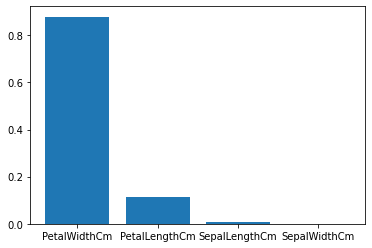

In [57]:
plt.bar(importances_df['Atrybut'], importances_df['Ważność'])
plt.show() #Atrybutem najlepiej rozróżniającym rodzaje irysów jest szerokość płatków